# Heart Disease Prediction

- Hannah Dickescheid (50178)
- Julia Stieler (56040)
- Eva Zinser (53100)
- Carlos Ferrufino (53276)
- Celina Kollwitz (53676)

Heart disease is one of the leading causes of death worldwide, and early detection can be critical for successful treatment. Machine learning has emerged as a powerful tool for predicting the risk of heart disease by analyzing various features such as age, gender, blood pressure, cholesterol level, and smoking habits. In this notebook, we will explore a heart disease dataset and build a machine learning model to predict the likelihood of heart disease based on various patient features.

# Business Problem

One of the biggest causes of death is heart disease. The World Health Organization estimates that 17.9 million people worldwide per year die because of cardiovascular disorders (CVD), such as heart disease. By 2030, the WHO expects that there will be 23.6 million fatalities caused by CVD worldwide, with heart disease and stroke being the main contributors.

A cardiovascular disease is any condition affecting the heart and blood vessels. A cardiovascular problem affects the main blood vessels that supply the heart muscles. These blood channels develop plaque, which is made up of cholesterol deposits, that restricts blood flow to the heart and other vital organs. If undetected, this can eventually result in a heart attack, stroke, or heart failure. Heart conditions are regarded as silent killers and sometimes aren't discovered until they start to cause life threatening symptoms. Detecting a heart disease is complex and takes many different methods (also in combination) for diagnosis: a variety of blood tests, MRIs and CT scans, ECGs, or Holter monitoring.

However, there is not only the huge amount of fatalities caused by this diseases. Additionally, heart disease places a heavy financial cost on society. The estimated global economic cost of cardiovascular diseases between 2010 and 2015 was USD 3.7 trillion. Employees with cardiovascular disease were responsible for 25–35% of a company's annual medical costs. To reduce the financial and physical costs of heart disease for individuals, organizations, and society as a whole, early detection is crucial. It is feasible to develop models that could assist in predicting the probability of who is most likely to suffer from heart disease by utilizing Machine Learning. 

Machine learning is already important in the field of medicine. It is being utilized for the purposes of diagnosis, detection, and prediction of various diseases. In recent times there has been an increased focus on the use of machine learning techniques to determine the likelihood of developing specific illnesses. Numerous recent studies have been conducted on the topic of developing applications of techniques for predicting diseases.

Not only medical information technology is developing. Also, different types of medical data are advancing and support the use of machine learning techniques. Big data in medicine is frequently utilized to raise the standard of healthcare. These data consist of audio files, laboratory results, earlier diagnosis reports, clinical notes, research, and visuals.
In recent years, the field of machine learning in the healthcare industry has been improved significantly. These methods have gained widespread acceptance and have proven effective in a variety of healthcare settings, particularly in the area of medical cardiology. The quick accumulation of medical data has given researchers an unexpected chance to create and evaluate new algorithms in this area.

In the following are a few relevant business context examples where using machine learning can be extremely beneficial:
- **Healthcare providers** can use this data to create individualized prevention and treatment strategies for people who are at risk, which over time can improve health outcomes and save costs.
- **Insurance companies** can use this information to assess and manage risk, which will allow them to establish reasonable premiums and prevent needless pay-outs.
- **Public health organizations** can use this information to create targeted education and awareness campaigns that will assist people become more aware of the dangers connected with heart disease and motivate them to take precautions to lower their risk.

To help predicting the likelihood of developing a heart disease will not only support reducing global fatalities caused by CVD but also support the healthcare industry. 

**Limitations**
However, there are some limitations while working with data regarding heart disease, that have to be addressed. 
The fact that the data scientists using the algorithm do not have sufficient medical understanding is one factor contributing to a high failure rate of data science applications in healthcare. There is not sufficient domain knowledge to fully understand the data, which is why the people developing the machine learning model ideally work closely together with doctors and cardiologists. 

An example of this is that it can be observed that quite often there is insufficient data for each patient in a medical dataset, with only one data point listed for each feature. The main issue is that variables like blood pressure, cholesterol, and pulse are not constant. A person's heartbeat and blood pressure change throughout the day and hour. For a patient, it is ideal to have several measurements for each aspect.
By developing a machine learning algorithm in this context, it is important to underline, that this will be seen as an approach to help identify patients who are more likely to develop a heart disease. It will not replace a proper diagnosis.

**Objective**
The objective of the project is to understand how Machine Learning algorithms can be used to support in predicting if a patient has a higher probability of getting a heart disease by building an optimized model that can be used to predict heart diseases.

**Approach**
We are using supervised learning for this task because it is a well-suited approach for predicting outcomes based on labeled input data. In this case, we have a dataset with information about patients, including various features such as blood pressure, cholesterol levels, and age, along with a label indicating whether the patient has heart disease or not. Supervised learning allows us to use this labeled dataset to train a model that can then predict whether a new patient is at risk of developing heart disease based on their features.

The specific supervised learning algorithms we are using are logistic regression, decision tree, random forest, support vector machine, and neural network. By comparing the performance of these algorithms, we can identify the most suitable one for our task and optimize it through hyperparameter tuning. 

# About the dataset

The US Centers for Disease Control and Prevention (CDC) publishes each year the Behavioral Risk Factor Surveillance System (BRFSS), which is the nation’s premier system of health-related telephone surveys. It collects data about US residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world. 

With technical and methodological assistance from CDC, state health departments use in-house interviewers or contract with telephone call centers or universities to administer the BRFSS surveys continuously through the year. The states use a standardized core questionnaire, optional modules, and state-added questions. The survey is conducted using Random Digit Dialing (RDD) techniques on both landlines and cell phones.

For our project we used the 2015 survey data. 
https://www.cdc.gov/brfss/annual_data/annual_2011.htm

The datasat includes 330 columns that refer each column to a queston asked to the participants.

In [5]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, silhouette_score
from sklearn import set_config
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
set_config(display="diagram")

# Cleaning

In [7]:
# Loading the dataset
data_df = pd.read_csv("data/2015.csv")
data_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


# Dataset exploration

In [8]:
data_df.shape

(441456, 330)

The shape tells us that the dataset has 330 columns and 441456 survey participants in 2015.

In [9]:
data_df.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)

In [10]:
data_df.describe()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,441456.000000,441456.000000,441456.000000,4.414560e+05,4.414560e+05,254645.0,254645.000000,45.0,254643.0,254646.000000,...,441456.000000,441456.000000,438657.000000,438657.000000,438657.000000,441456.000000,441456.000000,157954.000000,157954.000000,398069.000000
mean,29.968715,6.359676,1115.040457,2.015005e+09,2.015005e+09,1.0,1.000177,1.0,1.0,1.545133,...,3.494124,2.742695,2.716879,2.815149,3.652717,1.824624,1.887028,2.290705,2.412259,1.970156
std,16.034710,3.487131,35.746794,4.113443e+03,4.113443e+03,0.0,0.013292,0.0,0.0,0.497960,...,2.398322,2.449676,1.324145,1.356101,1.266730,2.360812,2.351387,2.518086,2.778032,1.441119
min,1.000000,1.000000,1100.000000,2.015000e+09,2.015000e+09,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,1100.000000,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,29.000000,6.000000,1100.000000,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,2.000000,...,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,44.000000,9.000000,1100.000000,2.015007e+09,2.015007e+09,1.0,1.000000,1.0,1.0,2.000000,...,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,72.000000,12.000000,1200.000000,2.015023e+09,2.015023e+09,1.0,2.000000,1.0,1.0,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [11]:
# These are all column names
columns = list(data_df)
columns

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENUM',
 'PVTRESD1',
 'COLGHOUS',
 'STATERES',
 'CELLFON3',
 'LADULT',
 'NUMADULT',
 'NUMMEN',
 'NUMWOMEN',
 'CTELNUM1',
 'CELLFON2',
 'CADULT',
 'PVTRESD2',
 'CCLGHOUS',
 'CSTATE',
 'LANDLINE',
 'HHADULT',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'HLTHPLN1',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'BPHIGH4',
 'BPMEDS',
 'BLOODCHO',
 'CHOLCHK',
 'TOLDHI2',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD1',
 'HAVARTH3',
 'ADDEPEV2',
 'CHCKIDNY',
 'DIABETE3',
 'DIABAGE2',
 'SEX',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL2',
 'NUMPHON2',
 'CPDEMO1',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'INTERNET',
 'WEIGHT2',
 'HEIGHT3',
 'PREGNANT',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'ALCDAY5',
 'AVEDRNK2',
 'DRNK3GE

In [12]:
missing_values = data_df.isna().sum().sort_values(ascending=False)
missing_values

QLSTRES2    441456
PAINACT2    441456
QLHLTH2     441456
QLMENTL2    441456
LADULT      441411
             ...  
_RACE            0
_HISPANC         0
_MRACE1          0
_PRACE1          0
_STATE           0
Length: 330, dtype: int64

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


In [14]:
corr_all = data_df.corr()['_MICHD']
corr_all_sorted = corr_all.sort_values(ascending=False)
corr_all_sorted.head(30)

_MICHD      1.000000
CVDINFR4    0.628853
CVDCRHD4    0.383577
CVDASPRN    0.227222
LADULT      0.213561
BPHIGH4     0.205225
_DRDXAR1    0.169966
DIABETE3    0.161836
DRADVISE    0.149139
USEEQUIP    0.135539
DIFFWALK    0.134928
ASERVIST    0.127937
HAVARTH3    0.122691
QLACTLM2    0.116613
TOLDHI2     0.115541
CDASSIST    0.114933
ASPUNSAF    0.111376
PNEUVAC3    0.102862
CVDSTRK3    0.101249
VICTRCT4    0.099310
CDHOUSE     0.097491
PHYSHLTH    0.097020
ADMOVE      0.095792
_CHLDCNT    0.094976
INSULIN     0.092849
ARTHSOCL    0.091247
VETERAN3    0.091108
_LMTSCL1    0.088946
ASINHALR    0.087304
CHCCOPD1    0.086943
Name: _MICHD, dtype: float64

Here, we wanted to have a look at the top 30 of highest correlated features to the target column. We can see that CVDINFR4 (Did you ever have a heart attack?) has the highest correlation with around 0.63 to our target variable. Then, the second highest correlation shows CVDCRHD4 (Ever told) you had angina or coronary heart disease?) with 0.38. The third best feature (Do you take aspirin daily or every other day?) has then a correlation of 0.23. It is interesting that the first two best related features all had something to do with heart diseases and the third one seems to be rather general. After that the next best correlated featues all show values between 0.16 and 0.08.
**Explanation why not the first 3**

In [ ]:
#nice correlation matrix (copy paste from below)

exclude also CVDCRHD4

## Selection of the relevant columns

From the 330 variables in the survey, we chose 27 features in the end because most of the 330 variables are not relevant to our main goal (e.g. information about the cell phone, state, number of orange-colored fruits eaten)
Research regarding heart disease has identified different important risk factors. We chose these from the dataset and also those where we have thought, there could be a correlation between those values.

**Target Value**
- **_MICHD:** having coronary heart disease (CHD) or myocardial infarction (MI); 1: yes, 2: no --> this is our target value

**Specific Illnesses**
- **_RFHYPE5:** Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional; 1: no, 2: yes
- **BPHIGH4:** Have you EVER been told by a doctor, nurse or other health professional that you have high blood pressure? (If "Yes" and respondent is female, ask "Was this only when you were pregnant?".); 1: yes, 2: yes, but female only told high during pregnancy, 3: no, 4: told borderline high or pre-hypertensive, 7: dont know, 9: refused
- **CVDSTRK3:** (Ever told) you had a stroke.; 1: yes, 2: no, 7: dont know, 9: refused
- **TOLDHI2:** Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?; 1: yes, 2: no, 7: dont know, 9: refused
- **_CHOLCHK:** Cholesterol check within past five years; 1: Had cholesterol checked in past 5 years; 2: Did not have cholesterol checked in past 5 years, 3: never had cholesterol checked, 9: dont know/refused
- **DIABETE3:** (Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?". If Respondent says pre-diabetes or borderline diabetes, use response code 4.); 1: yes, 2: Yes, but female only told during pregnancy, 3: no, 4: no, pre-diabetes or borderline-diabetes, 7: dont know, 9: refused
- **BPMEDS:** Are you currently taking medicine for your high blood pressure?; 1: yes, 2: no, 7: dont know, 9: refused
- **FLUSHOT6:** During the past 12 months, have you had either a flu shot or a flu vaccine that was sprayed in your nose? (A new flu shot came out in 2011 that injects vaccine into the skin with a very small needle. It is called Fluzone Intradermal vaccine. This is also considered a flu shot.); 1: yes, 2: no; 7: dont know, 9: refused
- **CHCKIDNY:** (Ever told) you have kidney disease? Do NOT include kidney stones, bladder infection or incontinence.(Incontinence is not being able to control urine flow.); 1: yes, 2: no, 7: dont know, 9: refused


**General Health Status**
- **SMOKE100:** Have you smoked at least 100 cigarettes in your entire life?; 1: yes, 2: no, 7: dont know, 9: refused
- **_BMI5:** Body Mass Index (BMI); WTKG3/(HTM4*HTM4)
- **_TOTINDA:** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job; 1: yes, 2: no, 9: dont know/refused
- **_FRTLT1:** Consume Fruit 1 or more times per day; 1: yes, 2: no, 9: dont know/refused
- **_VEGLT1:** Consume Vegetables 1 or more times per day; 1: yes, 2: no, 9: dont know
- **_RFDRHV5:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week); 1: no, 2: yes, 9: dont know/refused
- **GENHLTH:** Would you say that in general your health is:; 1: excellent, 2: very good, 3: good, 4: fair, 5: poor, 7: dont know, 9: refused
- **MENTHLTH:** Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?; nr. of days, 88: none, 77: dont know, 99: refused
- **PHYSHLTH:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?; nr of days, 88: none, 77: dont know, 99: refused
- **DIFFWALK:** Do you have serious difficulty walking or climbing stairs?; 1: yes, 2: no, 7: dont know, 9: refused
- **SEX:** 1: male, 2: female

**General Information**
- **HLTHPLN1:** Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?; 1: yes, 2: no, 7: dont know, 9: refused
- **MEDCOST:** Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?; 1: yes, 2: no, 7: dont know, 9: refused
- **_AGEG5YR:** Fourteen-level age category; 1: 18-24, 2: 25-29, 3: 30-34, 4: 35-39, ..., 13: 80 or older, 14: refused
- **EDUCA:** What is the highest grade or year of school you completed?; 1: never attended school or only kindergarden, 2: Grades 1 through 8 (Elementary), 3: Grades 9 through 11 (Some high school), 4: Grade 12 or GED (High school graduate), 5: College 1 year to 3 years (Some college or technical school), 6: College 4 years or more (College graduate), 9: refused
- **INCOME2:** Is your annual household income from all sources:; 1: Less than $10,000, 2: Less than $15,000 ($10,000 to less than $15,000), 3: Less than $20,000 ($15,000 to less than $20,000), 4: Less than $25,000 ($20,000 to less than $25,000), 5: Less than $35,000 ($25,000 to less than $35,000), 6: Less than $50,000 ($35,000 to less than $50,000), 7: Less than $75,000 ($50,000 to less than $75,000), 8: $75,000 or more, 77: dont know, 99: refused
- **EMPLOY1:** Are you currently...?; 1: Employed for wages, 2: Self-employed, 3: Out of work for 1 year or more, 4: Out of work for less than 1 year, 5: A homemaker, 6: A student, 7: Retired , 8: Unable to work, 9: refused




In [15]:
# select specific columns
data_df_selected = data_df[['_MICHD', 
                                         '_RFHYPE5',  
                                         'TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100', 
                                         'CVDSTRK3', 'DIABETE3', 
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2', 'EMPLOY1', 
                                         'FLUSHOT6', 'CHCKIDNY', 'BPMEDS'
                           ]]

In [16]:
data_df_selected.head()

,_MICHD,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,_FRTLT1,...,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2,EMPLOY1,FLUSHOT6,CHCKIDNY,BPMEDS
0,2.0,2.0,1.0,1.0,4018.0,1.0,2.0,3.0,2.0,2.0,...,15.0,1.0,2.0,9.0,4.0,3.0,8.0,1.0,2.0,1.0
1,2.0,1.0,2.0,2.0,2509.0,1.0,2.0,3.0,1.0,2.0,...,88.0,2.0,2.0,7.0,6.0,1.0,3.0,2.0,2.0,NaN
2,NaN,1.0,1.0,1.0,2204.0,NaN,1.0,3.0,9.0,9.0,...,15.0,NaN,2.0,11.0,4.0,99.0,7.0,NaN,2.0,NaN
3,2.0,2.0,1.0,1.0,2819.0,2.0,2.0,3.0,2.0,1.0,...,30.0,1.0,2.0,9.0,4.0,8.0,8.0,1.0,2.0,1.0
4,2.0,1.0,2.0,1.0,2437.0,2.0,2.0,3.0,2.0,9.0,...,20.0,2.0,2.0,9.0,5.0,77.0,8.0,2.0,2.0,NaN


<AxesSubplot:>

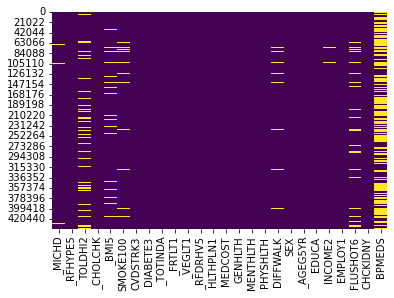

In [17]:
# explore the missing values
missing_values = data_df_selected.isna().sum()
missing_values
sns.heatmap(data_df_selected.isnull(),cbar=False,cmap='viridis')

## Handling missing data

In the heatmap it can be seen that we have in some columns a lot of missing data entries. Especially the TOLDHI2 (High blood cholesterol), _BMI5 (BMI), and the FLUSHOT6 (have received flu shot) columns have a lot of missing values.
We have thought about the following strategies to deal with the missing values:

- **Delete rows or columns:** This is the simplest approach, where you simply remove any rows or columns that contain missing values. However, this approach can lead to loss of valuable information, especially if a large proportion of the data is missing.
- **Imputation:** This approach involves filling in the missing values with estimated values. One common method is mean imputation, where the missing values are replaced with the mean value of the feature. Another method is median imputation, where the missing values are replaced with the median value of the feature. There are also more advanced imputation techniques, such as k-nearest neighbors (KNN) imputation and regression imputation, which take into account the relationships between different features.
- **Model-based imputation:** This approach involves building a predictive model to estimate the missing values based on the values of other features in the dataset. This can be more accurate than simple imputation methods, but requires more computational resources.
- **Flagging:** This approach involves adding a new binary feature that indicates whether a value is missing or not. This can be useful if the missing values are informative in themselves.
- **Domain knowledge:** In some cases, missing values can be explained by the nature of the problem or the data collection process. In these cases, domain knowledge can be used to impute or flag missing values in a more meaningful way.

As these values are mostly binary values (either yes or no) it is difficult to replace missing values with estimated values. Furthermore, the missing values do not have any meaning the reason is just that the questions was probably not asked in a certain state. However, the amount of missing values is a lot and because it is just caused by very few columns, that not even have a high correlation with the target variable, we decided to delete the whole columns. 

In [18]:
data_df_selected.describe()

,_MICHD,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,DIABETE3,_TOTINDA,_FRTLT1,...,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2,EMPLOY1,FLUSHOT6,CHCKIDNY,BPMEDS
count,437514.000000,441456.000000,382302.000000,441456.000000,405058.000000,427201.000000,441456.000000,441449.000000,441456.000000,441456.000000,...,441455.000000,429122.000000,441456.000000,441456.000000,441456.000000,438155.000000,441456.000000,400075.000000,441456.000000,178188.000000
mean,1.911699,1.428410,1.630876,1.533609,2804.242400,1.613987,1.973880,2.757888,1.931871,2.131746,...,60.655113,1.856600,1.576542,7.803623,4.920094,20.253013,3.942769,1.570316,1.983310,1.173328
std,0.283733,0.646749,0.740235,1.555462,665.463433,0.746530,0.348689,0.723319,2.209728,2.322882,...,37.055684,0.579838,0.494107,3.495609,1.076198,31.853507,2.871768,0.781987,0.368072,0.454448
min,1.000000,1.000000,1.000000,1.000000,1202.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2373.000000,1.000000,2.000000,3.000000,1.000000,1.000000,...,15.000000,2.000000,1.000000,5.000000,4.000000,5.000000,1.000000,1.000000,2.000000,1.000000
50%,2.000000,1.000000,2.000000,1.000000,2695.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,88.000000,2.000000,2.000000,8.000000,5.000000,7.000000,3.000000,2.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,3090.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,88.000000,2.000000,2.000000,10.000000,6.000000,8.000000,7.000000,2.000000,2.000000,1.000000
max,2.000000,9.000000,9.000000,9.000000,9995.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,99.000000,9.000000,2.000000,14.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000


In [19]:
# drop missing values
entries_total = data_df_selected.shape
data_df_selected = data_df_selected.dropna()
entries_after_drop = data_df_selected.shape
print(entries_total, entries_after_drop)
print("Sum of removed columns with empty values: ", entries_total[0] - entries_after_drop[0])

(441456, 26) (143001, 26)
Sum of removed columns with empty values:  298455


In [20]:
# Rename the columns to make them more readable
data_df_selected = data_df_selected.rename(columns = {'_MICHD':'HeartDiseaseorAttack', 
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', 'DIABETE3':'Diabetes', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Vegetables", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income',
                                         'EMPLOY1':'Employment',
                                         'FLUSHOT6':'FluShot', 'CHCKIDNY':'KidneyDisease', 'BPMEDS':'MedHighBP'})

### Process dataset for a machine learning approach

Before starting to work with the dataset, we will need to preprocess most columns. First, we needed to transform the values of the "binary" columns. With binary columns we mean columns where the answers are e.g. 1 and 2 yes and no and 7 means "I don't know" and 9 means "Refuse to answer" in the survey. Thus, it was necessary to delete data entries that contain a 7 or a 9. Furthermore, we changed no values to 0 and the yes values to 1. 

- There were a lot of columns where we needed to delete the 7 and 9 data entries and change 2 to 0 data entries. Therefore, we wrote a function that helps us doing that
- The rest where we needed to change different things we did it manually as it was the most efficient way in our opinion

In [21]:
data_df_selected.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Vegetables',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Employment', 'FluShot', 'KidneyDisease', 'MedHighBP'],
      dtype='object')

The unique values for column HeartDiseaseorAttack are:  [0. 1.]


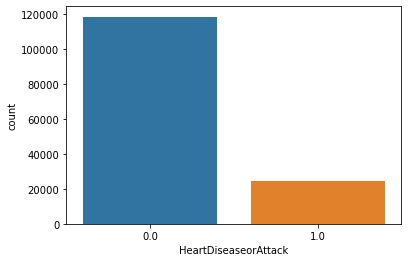

The unique values for column HighChol are:  [1. 0.]


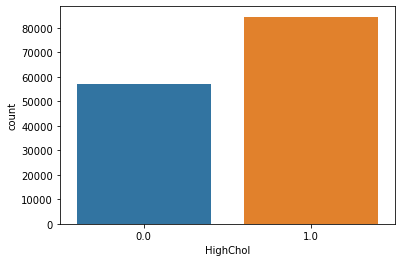

The unique values for column Smoker are:  [1. 0.]


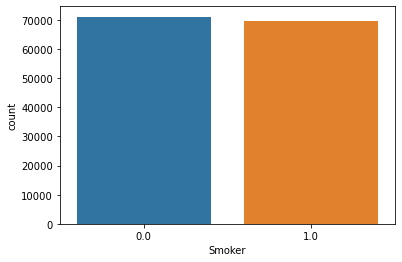

The unique values for column Stroke are:  [0. 1.]


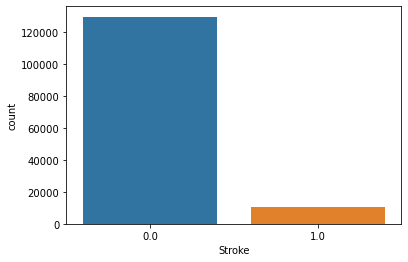

The unique values for column PhysActivity are:  [0. 1.]


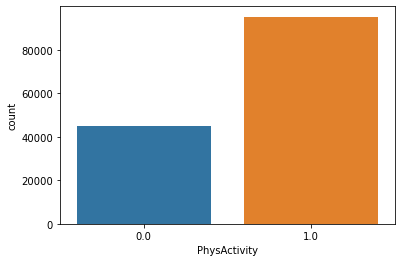

The unique values for column Fruits are:  [0. 1.]


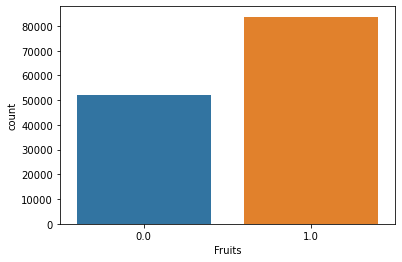

The unique values for column Vegetables are:  [1. 0.]


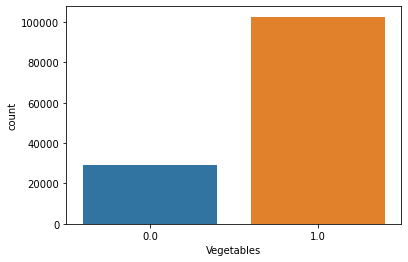

The unique values for column AnyHealthcare are:  [1. 0.]


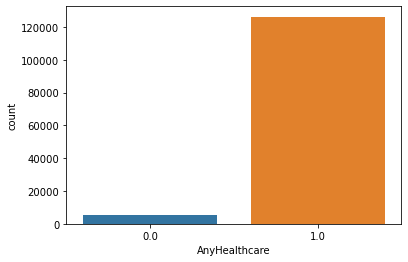

The unique values for column NoDocbcCost are:  [0. 1.]


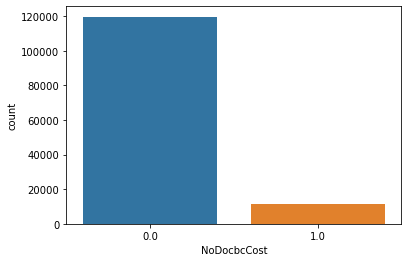

The unique values for column DiffWalk are:  [1. 0.]


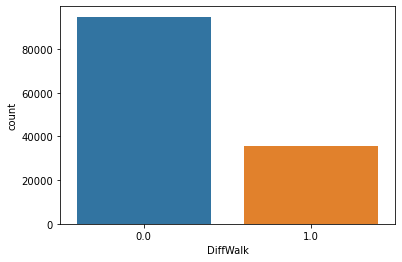

The unique values for column Sex are:  [0. 1.]


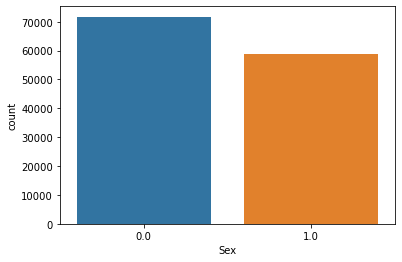

The unique values for column FluShot are:  [1. 0.]


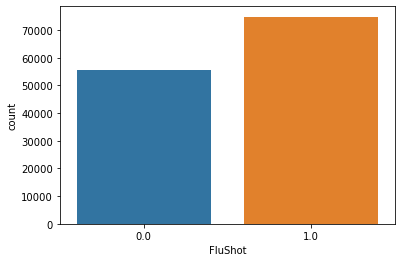

The unique values for column KidneyDisease are:  [0. 1.]


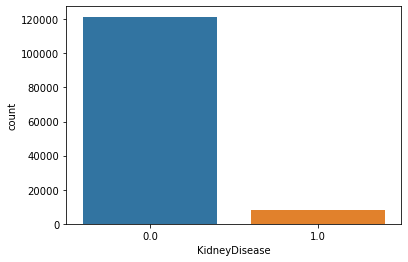

The unique values for column MedHighBP are:  [1. 0.]


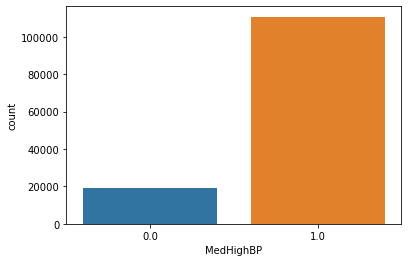

In [23]:
change_2_to_0 = ['HeartDiseaseorAttack', 'HighChol', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Vegetables', 'AnyHealthcare', 'NoDocbcCost',
                     'DiffWalk', 'Sex', 'FluShot', 'KidneyDisease', 'MedHighBP']
def preprocessing(df, list_a):
    # for the columns where a value of 2 is corresponding to 'no' change them to 0
    # delete 7 and 9 columns that represent 'I dont know' and 'Refused to answer' answers
    for x in list_a:
        df = df[df[x] != 7]
        df = df[df[x] != 9]
        df[x] = df[x].replace({2: 0})
        print(f'The unique values for column {x} are: ', df[x].unique())
        # count the number of entries with and without heart disease
        with_disease_counts = df[df['HeartDiseaseorAttack'] == 1][x].value_counts()
        without_disease_counts = df[df['HeartDiseaseorAttack'] == 0][x].value_counts()
        num_with_disease = with_disease_counts.loc[1] if 1 in with_disease_counts.index else 0
        num_without_disease = without_disease_counts.loc[1] if 1 in without_disease_counts.index else 0
        # create a bar plot with heart disease counts
        sns.countplot(x=x, hue='HeartDiseaseorAttack', data=df, palette='coolwarm')
        # show the counts in the legend
        plt.legend(title='Heart Disease', labels=[f'Without ({num_without_disease})', f'With ({num_with_disease})'])
        plt.show()
    return df
        
data_df_selected = preprocessing(data_df_selected, change_2_to_0)

In [52]:
#1 HighBP
#Change 1 to 0 so it represents No high blood pressure and 2 to 1 so it represents high blood pressure
data_df_selected['HighBP'] = data_df_selected['HighBP'].replace({1:0, 2:1})
data_df_selected = data_df_selected[data_df_selected.HighBP != 9]
data_df_selected.HighBP.unique()
#sns.countplot(x='HighBP', data=data_df_selected)
#plt.show()

array([0.])

In [53]:
#3 CholCheck
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
data_df_selected['CholCheck'] = data_df_selected['CholCheck'].replace({3:0,2:0})
data_df_selected = data_df_selected[data_df_selected.CholCheck != 9]
data_df_selected.CholCheck.unique()

array([1., 0.])

Unique values of BMI: [0.]


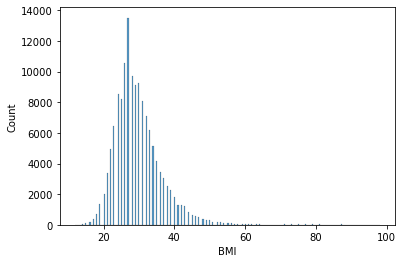

In [28]:
#4 BMI divde by 100 in order to get the correct measurements of the BMI
data_df_selected['BMI'] = data_df_selected['BMI'].div(100).round(0)

# Display the unique values of BMI
print('Unique values of BMI:', data_df_selected['BMI'].unique())

# plot the distribution of the values
sns.histplot(data=data_df_selected, x='BMI')
plt.show()

Here, it becomes visible that obesity is one of the main problems in developed countries like the US. Most of the data entries are according to their BMI already overweight. 

Unique values of Diabetes: [0.]


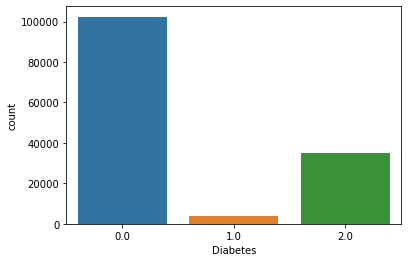

In [55]:
#7 Diabetes
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
data_df_selected['Diabetes'] = data_df_selected['Diabetes'].replace({2:0, 3:0, 1:2, 4:1})
data_df_selected = data_df_selected[data_df_selected.Diabetes != 7]
data_df_selected = data_df_selected[data_df_selected.Diabetes != 9]

# Display the unique values of Diabetes
print('Unique values of Diabetes:', data_df_selected['Diabetes'].unique())

# plot the distribution of the values
sns.countplot(data=data_df_selected, x='Diabetes')
plt.show()

Unique values of HvyAlcoholConsump: [0.]


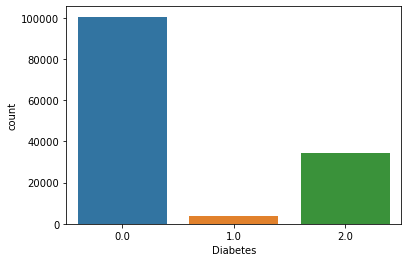

In [56]:
#11 HvyAlcoholConsump
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
data_df_selected['HvyAlcoholConsump'] = data_df_selected['HvyAlcoholConsump'].replace({1:0, 2:1})
data_df_selected = data_df_selected[data_df_selected.HvyAlcoholConsump != 9]

# Display the unique values of HvyAlcoholConsump
print('Unique values of HvyAlcoholConsump:', data_df_selected['HvyAlcoholConsump'].unique())

# plot the distribution of the values
sns.countplot(data=data_df_selected, x='Diabetes')
plt.show()

Unique values of GenHlth: [5. 2. 3. 4. 1.]


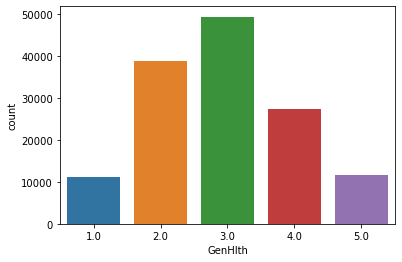

In [57]:
#14 GenHlth
# This is an ordinal variable that should be kept (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
data_df_selected = data_df_selected[data_df_selected.GenHlth != 7]
data_df_selected = data_df_selected[data_df_selected.GenHlth != 9]

# Display the unique values of GenHlth
print('Unique values of GenHlth:', data_df_selected['GenHlth'].unique())

# Plot a countplot of GenHlth
sns.countplot(data=data_df_selected, x='GenHlth')
plt.show()

Unique values of MentHlth: [18. 30.  0.  3.  5. 15.  6. 20. 25.  1. 10.  2.  4.  8. 21. 14.  7. 29.
 16. 28. 11. 12. 24. 17. 13. 19. 26.  9. 23. 27. 22.]


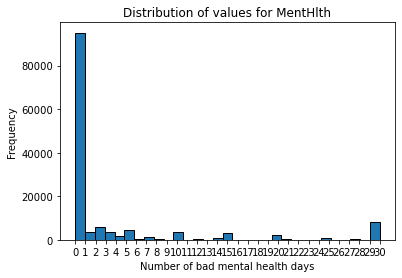

In [39]:
#15 MentHlth
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
data_df_selected['MentHlth'] = data_df_selected['MentHlth'].replace({88:0})
data_df_selected = data_df_selected[data_df_selected.MentHlth != 77]
data_df_selected = data_df_selected[data_df_selected.MentHlth != 99]

# Display the unique values of MentHlth
print('Unique values of MentHlth:', data_df_selected['MentHlth'].unique())

plt.hist(data_df_selected['MentHlth'], bins=31, range=(0, 30), edgecolor='black')
plt.xticks(range(0, 31))
plt.xlabel('Number of bad mental health days')
plt.ylabel('Frequency')
plt.title('Distribution of values for MentHlth')
plt.show()

Unique values of PhysHlth: [15. 30.  0.  2. 14. 20.  7.  3.  5. 17.  1. 10.  4.  6. 12. 28. 25. 27.
 22.  8. 29. 24.  9. 21. 16. 23. 13. 18. 26. 19. 11.]


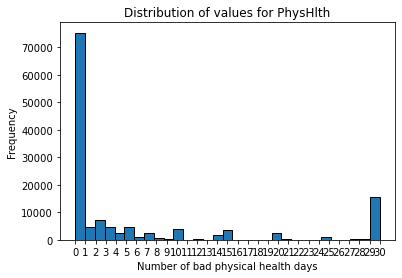

In [40]:
#16 PhysHlth
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
data_df_selected['PhysHlth'] = data_df_selected['PhysHlth'].replace({88:0})
data_df_selected = data_df_selected[data_df_selected.PhysHlth != 77]
data_df_selected = data_df_selected[data_df_selected.PhysHlth != 99]

# Display the unique values of PhysHlth
print('Unique values of PhysHlth:', data_df_selected['PhysHlth'].unique())

plt.hist(data_df_selected['PhysHlth'], bins=31, range=(0, 30), edgecolor='black')
plt.xticks(range(0, 31))
plt.xlabel('Number of bad physical health days')
plt.ylabel('Frequency')
plt.title('Distribution of values for PhysHlth')
plt.show()

Unique values of Age: [ 9. 11. 10.  6. 12. 13.  8.  7.  4.  5.  3.  2.  1.]


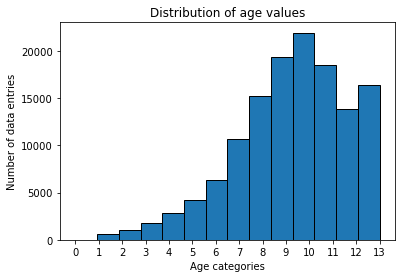

In [60]:
#19 Age
# already ordinal. 1 is 18-24 all the way up to 13 is 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
data_df_selected = data_df_selected[data_df_selected.Age != 14]

# Display the unique values of Age
print('Unique values of Age:', data_df_selected['Age'].unique())

# plot histogram to show the distribution of values for age
plt.hist(data_df_selected['Age'], bins=14, range=(0, 13), edgecolor='black')
plt.xticks(range(0, 14))
plt.xlabel('Age categories')
plt.ylabel('Number of data entries')
plt.title('Distribution of age values')
plt.show()

Unique values of Education: [4. 3. 5. 6. 2. 1.]


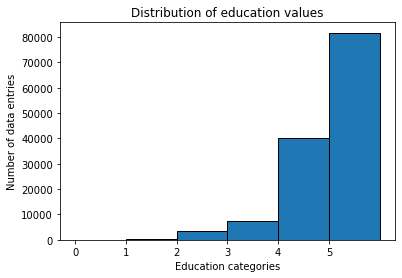

In [44]:
#20 Education
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
data_df_selected = data_df_selected[data_df_selected.Education != 9]
data_df_selected.Education.unique()

# Display the unique values of Education
print('Unique values of Education:', data_df_selected['Education'].unique())

# plot histogram to show the distribution of values for education
plt.hist(data_df_selected['Education'], bins=6, range=(0, 6), edgecolor='black')
plt.xticks(range(0, 6))
plt.xlabel('Education categories')
plt.ylabel('Number of data entries')
plt.title('Distribution of education values')
plt.show()

Unique values of Income: [3. 8. 6. 4. 7. 1. 5. 2.]


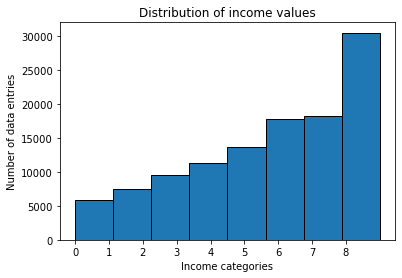

In [45]:
#21 Income
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
data_df_selected = data_df_selected[data_df_selected.Income != 77]
data_df_selected = data_df_selected[data_df_selected.Income != 99]

# Display the unique values of Income
print('Unique values of Income:', data_df_selected['Income'].unique())

# plot histogram to show the distribution of values for income
plt.hist(data_df_selected['Income'], bins=8, range=(0, 9), edgecolor='black')
plt.xticks(range(0, 9))
plt.xlabel('Income categories')
plt.ylabel('Number of data entries')
plt.title('Distribution of income values')
plt.show()

Unique values of Employment: [8. 2. 7. 5. 1. 3. 4. 6.]


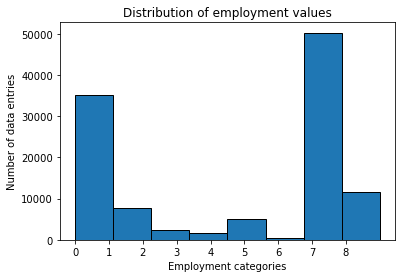

In [46]:
#22 Employment
# Categorical Variable 
# remove 9 for refused
data_df_selected = data_df_selected[data_df_selected.Employment != 9]
data_df_selected.Employment.unique()

# Display the unique values of Employment
print('Unique values of Employment:', data_df_selected['Employment'].unique())

# plot histogram to show the distribution of values for employment
plt.hist(data_df_selected['Employment'], bins=8, range=(0, 9), edgecolor='black')
plt.xticks(range(0, 9))
plt.xlabel('Employment categories')
plt.ylabel('Number of data entries')
plt.title('Distribution of employment values')
plt.show()

In [47]:
data_df_selected.shape

(114157, 26)

In [ ]:
data_df_selected.head()
data_df_selected['HeartDiseaseorAttack'].values

### Having a closer look on the selected dataset:

In [48]:
data_df_selected.shape

(114157, 26)

In [49]:
data_df_selected.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,Employment,FluShot,KidneyDisease,MedHighBP
count,114157.000000,114157.0,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000,...,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000,114157.000000
mean,1.833063,1.0,1.446193,0.983978,29.971933,1.525539,1.942921,0.517927,1.328626,1.542586,...,5.905656,1.752096,1.530322,9.301409,4.877441,5.608662,4.698407,1.450625,1.955237,1.155969
std,0.372921,0.0,0.689651,0.125560,6.869780,0.631086,0.376665,0.860564,0.595857,1.181563,...,10.114721,0.553383,0.499082,2.551054,1.026721,2.160639,2.866653,0.625748,0.407058,0.402282
min,1.000000,1.0,1.000000,0.000000,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.0,1.000000,1.000000,26.000000,1.000000,2.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,8.000000,4.000000,4.000000,1.000000,1.000000,2.000000,1.000000
50%,2.000000,1.0,1.000000,1.000000,29.000000,2.000000,2.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,2.000000,10.000000,5.000000,6.000000,7.000000,1.000000,2.000000,1.000000
75%,2.000000,1.0,2.000000,1.000000,33.000000,2.000000,2.000000,1.000000,2.000000,2.000000,...,6.000000,2.000000,2.000000,11.000000,6.000000,8.000000,7.000000,2.000000,2.000000,1.000000
max,2.000000,1.0,9.000000,1.000000,98.000000,9.000000,9.000000,2.000000,9.000000,9.000000,...,30.000000,9.000000,2.000000,13.000000,6.000000,8.000000,8.000000,9.000000,9.000000,9.000000


In [50]:
# save to csv
data_df_selected.to_csv('heart_disease_health_features.csv', sep=",", index=False)

# Building models

In [51]:
heart_df = pd.read_csv("heart_disease_health_features.csv")
heart_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,PhysHlth,DiffWalk,Sex,Age,Education,Income,Employment,FluShot,KidneyDisease,MedHighBP
0,2.0,1.0,1.0,1.0,40.0,1.0,2.0,0.0,2.0,2.0,...,15.0,1.0,2.0,9.0,4.0,3.0,8.0,1.0,2.0,1.0
1,2.0,1.0,1.0,1.0,28.0,2.0,2.0,0.0,2.0,1.0,...,30.0,1.0,2.0,9.0,4.0,8.0,8.0,1.0,2.0,1.0
2,2.0,1.0,2.0,1.0,27.0,2.0,2.0,0.0,1.0,1.0,...,0.0,2.0,2.0,11.0,3.0,6.0,2.0,1.0,2.0,1.0
3,2.0,1.0,1.0,1.0,24.0,2.0,2.0,0.0,1.0,1.0,...,0.0,2.0,2.0,11.0,5.0,4.0,7.0,2.0,2.0,1.0
4,2.0,1.0,1.0,1.0,25.0,1.0,2.0,0.0,1.0,1.0,...,2.0,2.0,1.0,10.0,6.0,8.0,7.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114152,2.0,1.0,2.0,1.0,42.0,2.0,2.0,0.0,1.0,1.0,...,4.0,2.0,1.0,3.0,6.0,8.0,1.0,2.0,2.0,1.0
114153,2.0,1.0,1.0,1.0,45.0,2.0,2.0,0.0,2.0,1.0,...,5.0,2.0,1.0,5.0,6.0,7.0,1.0,2.0,2.0,1.0
114154,2.0,1.0,1.0,1.0,18.0,2.0,2.0,2.0,2.0,2.0,...,0.0,1.0,2.0,11.0,2.0,4.0,7.0,2.0,2.0,1.0
114155,2.0,1.0,2.0,1.0,23.0,2.0,2.0,0.0,2.0,1.0,...,0.0,2.0,1.0,7.0,5.0,1.0,3.0,2.0,2.0,1.0


In [52]:
num_cols = heart_df.shape[1]
print("The number of columns in the DataFrame is:", num_cols)

The number of columns in the DataFrame is: 26


### Pre-processing pipeline

In [53]:
# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [54]:
# Create a copy of the original dataframe
preprocessed_df = heart_df.copy()

seed = 42

# define attributes
num_attribs = ['BMI', 'MentHlth', 'PhysHlth']
ordinal_attribs = ['Diabetes', 'GenHlth', 'Age', 'Education', 'Income']
cat_attribs = ['Employment']
binary_attribs = [col for col in preprocessed_df.columns if col not in num_attribs + cat_attribs + ordinal_attribs]

# define pipeline to apply feature scaling to numerical features
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler())
])

# define pipeline to apply feature scaling to ordinal features
ordinal_pipeline = Pipeline([
        ('selector', DataFrameSelector(ordinal_attribs)),
        ('ordinal_encoder', OrdinalEncoder()),
])

# define pipeline to apply one-hot encoding to categorical values
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

# define pipeline to keep other columns unchanged
binary_pipeline = Pipeline([
        ('selector', DataFrameSelector(binary_attribs)),
    ])


# apply different operations on num, ordinal and cat by combining pipelines with ColumnTransformer
preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("ordinal", ordinal_pipeline, ordinal_attribs),
        ("cat", cat_pipeline, cat_attribs),
        ("binary", binary_pipeline, binary_attribs)
    ])

processed_arr = preprocessing.fit_transform(preprocessed_df)
processed_arr

array([[ 1.45974263,  1.76876997,  0.89912353, ...,  1.        ,
         2.        ,  1.        ],
       [-0.28704588,  3.24920466,  2.38211707, ...,  1.        ,
         2.        ,  1.        ],
       [-0.43261159, -0.45188206, -0.58387   , ...,  1.        ,
         2.        ,  1.        ],
       ...,
       [-1.74270297, -0.45188206, -0.58387   , ...,  2.        ,
         2.        ,  1.        ],
       [-1.01487443, -0.45188206, -0.58387   , ...,  2.        ,
         2.        ,  1.        ],
       [-0.72374301, -0.45188206, -0.58387   , ...,  2.        ,
         2.        ,  1.        ]])

In [55]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['BMI',
                                                                                     'MentHlth',
                                                                                     'PhysHlth'])),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['BMI', 'MentHlth', 'PhysHlth']),
                                ('ordinal',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['Diabetes',
                                                                                     'GenHlth',
                                                                                     'Age',
                                                                                     'Education',
                                                                                     'Income'])),
                                                 ('ordinal_encoder',
                                                  OrdinalE...
                                                                                     'Fruits',
                                                                                     'Vegetables',
                                                                                     'HvyAlcoholConsump',
                                                                                     'AnyHealthcare',
                                                                                     'NoDocbcCost',
                                                                                     'DiffWalk',
                                                                                     'Sex',
                                                                                     'FluShot',
                                                                                     'KidneyDisease',
                                                                                     'MedHighBP']))]),
                                 ['HeartDiseaseorAttack', 'HighBP', 'HighChol',
                                  'CholCheck', 'Smoker', 'Stroke',
                                  'PhysActivity', 'Fruits', 'Vegetables',
                                  'HvyAlcoholConsump', 'AnyHealthcare',
                                  'NoDocbcCost', 'DiffWalk', 'Sex', 'FluShot',
                                  'KidneyDisease', 'MedHighBP'])])

In [56]:
# get feature names for numerical attributes
num_features = np.array(num_attribs)

# get feature names for ordinal attributes
ordinal_features = np.array(ordinal_attribs)

# get feature names for categorical attributes
cat_encoder = preprocessing.named_transformers_['cat'].named_steps['cat_encoder']
cat_features = cat_encoder.get_feature_names_out(cat_attribs)

# get feature names for other attributes
binary_features = np.array(binary_attribs)

# concatenate all feature names
feature_names = np.concatenate((num_features, ordinal_features, cat_features, binary_features), axis=0)
feature_names

array(['BMI', 'MentHlth', 'PhysHlth', 'Diabetes', 'GenHlth', 'Age',
       'Education', 'Income', 'Employment_1.0', 'Employment_2.0',
       'Employment_3.0', 'Employment_4.0', 'Employment_5.0',
       'Employment_6.0', 'Employment_7.0', 'Employment_8.0',
       'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Vegetables',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk',
       'Sex', 'FluShot', 'KidneyDisease', 'MedHighBP'], dtype=object)

In [57]:
preprocessed_df = pd.DataFrame(processed_arr, columns = feature_names)
preprocessed_df

,BMI,MentHlth,PhysHlth,Diabetes,GenHlth,Age,Education,Income,Employment_1.0,Employment_2.0,...,Fruits,Vegetables,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,FluShot,KidneyDisease,MedHighBP
0,1.459743,1.768770,0.899124,0.0,4.0,8.0,3.0,2.0,0.0,0.0,...,2.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
1,-0.287046,3.249205,2.382117,0.0,4.0,8.0,3.0,7.0,0.0,0.0,...,1.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
2,-0.432612,-0.451882,-0.583870,0.0,1.0,10.0,2.0,5.0,0.0,1.0,...,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0
3,-0.869309,-0.081773,-0.583870,0.0,1.0,10.0,4.0,3.0,0.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
4,-0.723743,-0.451882,-0.386138,0.0,1.0,9.0,5.0,7.0,0.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114152,1.750874,1.275292,-0.188405,0.0,2.0,2.0,5.0,7.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
114153,2.187571,-0.451882,-0.089539,0.0,2.0,4.0,5.0,6.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
114154,-1.742703,-0.451882,-0.583870,2.0,3.0,10.0,1.0,3.0,0.0,0.0,...,2.0,2.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0
114155,-1.014874,-0.451882,-0.583870,0.0,2.0,6.0,4.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0


In [58]:
X_processed = preprocessed_df.drop('HeartDiseaseorAttack', axis=1)
y = preprocessed_df['HeartDiseaseorAttack']

### Feature selection

In [59]:
rf = RandomForestClassifier()
selector = SelectFromModel(rf, threshold='mean')
selector.fit(X_processed, y)

X_new = selector.transform(X_processed)
selected_features = X_processed.columns[selector.get_support()]
selected_features

Index(['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income',
       'Fruits', 'Vegetables'],
      dtype='object')

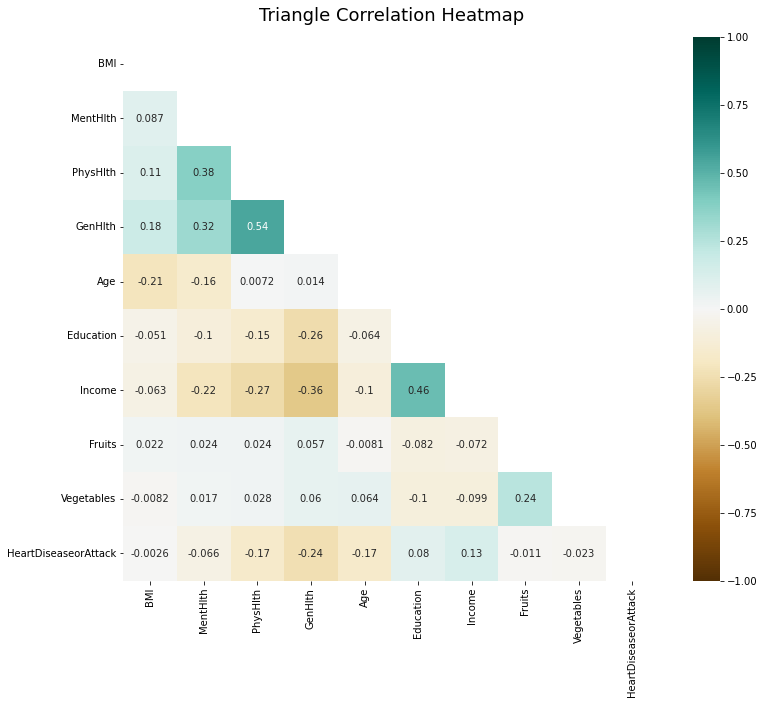

In [60]:
selected_columns = selected_features.tolist() + ['HeartDiseaseorAttack']

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(preprocessed_df[selected_columns].corr()))
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(preprocessed_df[selected_columns].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

The selected_features variable contains a pandas Index object that represents the column labels of the selected features after applying feature selection with the Random Forest Classifier model.

In this case, the selected features are 'BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income', 'Fruits' and 'Vegetables'. These are the columns that had importance scores greater than or equal to the mean importance score of all features.

The importance score is a metric that measures the relative importance of each feature in a machine learning model. The score indicates how much a feature contributes to the prediction of the target variable. In other words, it helps to identify which features are most relevant or informative for making accurate predictions.

### Inspect the balance of the dataset

In [61]:
print(preprocessed_df['HeartDiseaseorAttack'].value_counts())

2.0    95100
1.0    19057
Name: HeartDiseaseorAttack, dtype: int64


<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

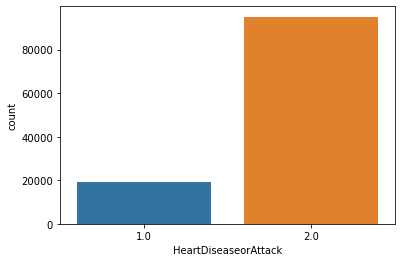

In [62]:
sns.countplot(x='HeartDiseaseorAttack', data=preprocessed_df)

**Implications of an unbalanced dataset**

An unbalanced dataset refers to a situation where the distribution of classes in the dataset is not equal or nearly equal. The dataset at hand is unbalanced, as it contains significantly more cases with people without a heart disease: the target-variable ‘HeartDiseaseorAttack‘ contains 229.787 entries without (0) and only 23.893 people with a heart disease (1). 

This causes several challenges:
1.	**Bias:** The model may be biased towards the majority class. This is because the model is optimized to minimize the overall error rate, which means it will focus more on the majority class (people without heart disease) at the expense of the minority class (people with heart disease).
2.	**Poor generalization:** The model may not generalize well to new data. This is because the model has not learned enough about the minority class (people with heart disease) to make accurate predictions.
3.	**Scoring metrics:** Some scoring metrics may not be a good choice for evaluating the classification of the unbalanced dataset. For example, precision can be high even when a model performs poorly on the minority class. This is because precision only takes into account the positive predictions made by the model, regardless of whether they belong to the majority or minority class. Additionally, accuracy is not a reliable metric to evaluate the performance of a classifier on unbalanced datasets. For example, a classifier that always predicts ‘no heart disease’ would have a high accurary but fail to identify the minority class. 

We address these issues the following way:
1.	We use the scoring metric recall because it takes into account the performance of the model on the minority class and because is particularly useful when the minority class (people with heart disease) is of greater importance than the majority class, as it reflects the ability of the model to correctly identify positive examples, regardless of their frequency. However, recall alone may not be sufficient to evaluate the performance of a model on an unbalanced dataset. The recall might be very low because the model is biased towards the majority class. Thus, we will also use the F1 score (harmonic mean of precision and recall) as it is also a frequently used metric to evaluate models trained on unbalanced datasets to provide a more complete evaluation of the model’s performance. 

2.	We will use class weighting to rebalance the dataset to give more importance to the minority class (people with heart disease) in the dataset set. The goal of the class weighting is to improve the performance of the model on the minority class for people with a heart disease. 


# Setting up the different train and test sets to be used

In [63]:
# split data into training and testing data sets, use processed X
# use all of the features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_processed, y, test_size = 0.2, random_state=seed)

# use the features identified by feature selection
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_processed[selected_features], y, test_size = 0.2, random_state=seed)

# set different class weights
wt1 = {0:1, 1:2}
wt2 = {0:1, 1:5}
wt3 = {0:1, 1:10}

# Testing different models on the various datasets
To compare the performance of the tested models we define a dataframe. This dataframe contains the scores of the models with each dataset. The scores are added to the dataframe by the scoring function defined below.

In [196]:
scoring_df = pd.DataFrame(columns = ["Model", "Dataset", "Accuracy", "Precision", "Recall", "ROC AUC"])

In [197]:
def scoring(model, dataset, test, pred):
    global scoring_df
    accuracy = accuracy_score(test, pred)
    precision = precision_score(test, pred)
    recall = recall_score(test, pred)
    roc_auc = roc_auc_score(test, pred)

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('ROC AUC:', roc_auc)
    
    scoring_df = scoring_df.append({"Model" : model, "Dataset" : dataset, "Accuracy" : accuracy, "Precision": precision,
                                    "Recall" : recall, "ROC AUC" : roc_auc}, ignore_index = True)

# Logistic Regression

In [198]:
# Logistic Regression using all features and no class weights
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_all, y_train_all)
y_pred_all = logreg.predict(X_test_all)

scoring("Logistic Regression", "All Features, no weights", y_test_all, y_pred_all)

Accuracy: 0.9546651617757712
Precision: 0.9971876255524307
Recall: 0.7217214306484443
ROC AUC: 0.8606643618880371


In [199]:
# Logistic Regression with all features and 2:1 class weights
logreg_wt1 = LogisticRegressionCV(class_weight=wt1, cv=10, max_iter=10000)
logreg_wt1.fit(X_train_all, y_train_all)
y_pred_wt1 = logreg_wt1.predict(X_test_all)

scoring("Logistic Regression", "All Features, 2:1 weights", y_test_all, y_pred_all_wt1)

Accuracy: 0.9478461249059443
Precision: 0.9379699248120301
Recall: 0.7255015993021227
ROC AUC: 0.8581224686552689


In [200]:
# Logistic Regression with all features and 5:1 class weights
logreg_wt2 = LogisticRegressionCV(class_weight=wt2, cv=10, max_iter=10000)
logreg_wt2.fit(X_train_all, y_train_all)
y_pred_wt2 = logreg_wt2.predict(X_test_all)

scoring("Logistic Regression", "All Features, 5:1 weights", y_test_all, y_pred_all_wt2)

Accuracy: 0.9469525959367946
Precision: 0.9306746179649646
Recall: 0.726083163710381
ROC AUC: 0.8578241905508426


In [201]:
# Logistic Regression with all features and 10:1 class weights
logreg_wt3 = LogisticRegressionCV(class_weight=wt3, cv=10, max_iter=10000)
logreg_wt3.fit(X_train_all, y_train_all)
y_pred_wt3 = logreg_wt3.predict(X_test_all)

scoring("Logistic Regression", "All Features, 10:1 weights", y_test_all, y_pred_all_wt3)

Accuracy: 0.9468115124153499
Precision: 0.9296351451973194
Recall: 0.726083163710381
ROC AUC: 0.8577400390781919


In [202]:
# Logistic Regression with all features and no class weights
logreg_sel = LogisticRegression(max_iter=10000)
logreg_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = logreg_sel.predict(X_test_sel)

scoring("Logistic Regression", "Selected Features, no weights", y_test_sel, y_pred_sel)

Accuracy: 0.9549473288186606
Precision: 1.0
Recall: 0.7214306484443153
ROC AUC: 0.8607153242221577


In [203]:
# Logistic Regression with all features and 2:1 class weights
logreg_sel_wt1 = LogisticRegressionCV(class_weight=wt1, cv=10, max_iter=10000)
logreg_sel_wt1.fit(X_train_sel, y_train_sel)
y_pred_sel_wt1 = logreg_sel_wt1.predict(X_test_sel)

scoring("Logistic Regression", "Selected Features, 2:1 weights", y_test_sel, y_pred_sel_wt1)

Accuracy: 0.9549473288186606
Precision: 1.0
Recall: 0.7214306484443153
ROC AUC: 0.8607153242221577


In [204]:
# Logistic Regression with all features and 5:1 class weights
logreg_sel_wt2 = LogisticRegressionCV(class_weight=wt2, cv=10, max_iter=10000)
logreg_sel_wt2.fit(X_train_sel, y_train_sel)
y_pred_sel_wt2 = logreg_sel_wt2.predict(X_test_sel)

scoring("Logistic Regression", "Selected Features, 5:1 weights", y_test_sel, y_pred_sel_wt2)

Accuracy: 0.941826561324304
Precision: 0.8820263705759889
Recall: 0.7391683628961907
ROC AUC: 0.8600470145476746


In [205]:
# Logistic Regression with all features and 10:1 class weights
logreg_sel_wt3 = LogisticRegressionCV(class_weight=wt3, cv=10, max_iter=10000)
logreg_sel_wt3.fit(X_train_sel, y_train_sel)
y_pred_sel_wt3 = logreg_sel_wt3.predict(X_test_sel)

scoring("Logistic Regression", "Selected Features, 10:1 weights", y_test_sel, y_pred_sel_wt3)

Accuracy: 0.856612114371708
Precision: 0.5377030162412993
Recall: 0.8086653096830474
ROC AUC: 0.8372639311388589


Accuracy measures the number of correct predictions made by the model compared to all predictions. However, the high accuracy score can be misleading in imbalanced datasets where one class is much more frequent than the others. This is the case in this dataset (229,787 no heart-disease, 23,893 heart-disease). If the model would always predict the majority class (no heart-disease) can have a high accuracy but still fail to capture the minority class (heart-disease).

Precision measures how well a model can predict positive examples. It is a useful metric when the cost of false positives is high.

The recall measures how well a model can identify positive examples. It is a useful metric when the cost of false negatives is high.

AUC is a metric suited for imbalanced datasets. AUC measures the overall performance of a binary classifier by computing the area under the ROC curve, which plots the true positive rate against the false positive rate for different classification thresholds. A high AUC score indicates that the classifier is able to distinguish between the positive and negative classes effectively, regardless of the class distribution. This makes the AUC an important mectric in this case. Measuring the AUC, the model is performing very badly. It has a AUC score of 0.5, which is the same as it would be randomly guessing.

The ROC AUC is still very low, even after altering the weight. Therefore, we will continue building the model including all features.

# Clustering

Using all features

In [ ]:
# Create k-mean object
clt = KMeans(n_clusters=3, random_state=0) #, n_jobs=-1)

# Train model
model = clt.fit(X_processed)
labels = model.predict(X_processed)

In [ ]:
silhouette = silhouette_score(X_processed, labels)
silhouette

In [ ]:
# Define a range of possible number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Initialize the silhouette scores list
silhouette_scores = []

# Loop over the range of possible number of clusters
for n_clusters in range_n_clusters:
    # Initialize the KMeans model
    model = KMeans(n_clusters=n_clusters, random_state=0)
    
    # Fit the model to the data
    model.fit(X_processed)
    
    # Predict the cluster labels for each data point
    labels = model.predict(X_processed)
    
    # Calculate the silhouette score
    silhouette_score_ = silhouette_score(X_processed, labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_score_)

# Find the number of clusters with the highest silhouette score
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]

print("The optimal number of clusters is:", best_n_clusters)

In [ ]:
# Initialize the KMeans model with best number of clusters
model = KMeans(n_clusters=best_n_clusters, random_state=0)

# Fit the model to the data
model.fit(X_processed)

# Predict the cluster labels for each data point
labels = model.predict(X_processed)

# Plot the data points with different colors representing different clusters
for label in np.unique(labels):
    data = X_processed[labels == label]
    plt.scatter(data[:, 0], data[:, 1], label=f"Cluster {label}")

plt.legend()
plt.show()

# Decision Tree Using All Features

In [ ]:
X = heart_df.drop('HeartDiseaseorAttack', axis=1) # features
y = heart_df['HeartDiseaseorAttack'] # target variable

# splitting data to understand model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# create decision tree classifier object
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# train decision tree with training data
tree_clf.fit(X_train, y_train)

# predict y for test set
y_pred = tree_clf.predict(X_test)

evaluating the model performance

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=list(X.columns),  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Decision Tree using selected features

In [ ]:
X = heart_df.drop('HeartDiseaseorAttack', axis=1)
X_sel = selected_df = X[selected_features].copy()

y = heart_df['HeartDiseaseorAttack']

# splitting data to understand model performance
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.3, random_state=1) # 70% training and 30% test

# create decision tree classifier object
tree_clf_sel = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

# train decision tree with training data
tree_clf_sel.fit(X_train, y_train)

# predict y for test set
y_pred = tree_clf_sel.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf_sel, 
                   feature_names=list(X.columns),  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a decision tree classifier with tuned hyperparameters
tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)
tree_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the testing set
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Load preprocessed data
X = np.load('preprocessed_features.npy')
y = np.load('labels.npy')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Define model architecture
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


# The random forest model
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction which is why we decided to focus on building a random forest model rather than a decision tree.

In [206]:
# Random Forest Model using all features and no weights
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_all, y_train_all)
y_pred_all = rf_clf.predict(X_test_all)

scoring("Random Forest", "All Features, no weights", y_test_all, y_pred_all)

Accuracy: 0.9521256583897667
Precision: 0.9737769080234834
Recall: 0.723466123873219
ROC AUC: 0.859853679047409


In [207]:
# Random Forest Model with all features and 2:1 class weights
rf_clf_wt1 = RandomForestClassifier(class_weight=wt1, random_state=42)
rf_clf_wt1.fit(X_train_all, y_train_all)
y_pred_all_wt1 = rf_clf_wt1.predict(X_test_all)

scoring("Random Forest", "All Features, 2:1 weights", y_test_all, y_pred_all_wt1)

Accuracy: 0.951232129420617
Precision: 0.9662267080745341
Recall: 0.7237569060773481
ROC AUC: 0.8594380603318018


In [208]:
# Random Forest Model with all features and 5:1 class weights
rf_clf_wt2 = RandomForestClassifier(class_weight=wt2, random_state=42)
rf_clf_wt2.fit(X_train_all, y_train_all)
y_pred_all_wt2 = rf_clf_wt2.predict(X_test_all)

scoring("Random Forest", "All Features, 5:1 weights", y_test_all, y_pred_all_wt2)

Accuracy: 0.9502445447705041
Precision: 0.9573568958893585
Recall: 0.7246292526897354
ROC AUC: 0.8592010218567893


In [209]:
# Random Forest Model with all features and 10:1 class weights
rf_clf_wt3 = RandomForestClassifier(class_weight=wt3, random_state=42)
rf_clf_wt3.fit(X_train_all, y_train_all)
y_pred_all_wt3 = rf_clf_wt3.predict(X_test_all)

scoring("Random Forest", "All Features, 10:1 weights", y_test_all, y_pred_all_wt3)

Accuracy: 0.949398043641836
Precision: 0.950438429279451
Recall: 0.7249200348938645
ROC AUC: 0.8588134536320655


In [210]:
# Random Forest Model with selected features and no class weights
rf_clf_sel = RandomForestClassifier(random_state=42)
rf_clf_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = rf_clf_sel.predict(X_test_sel)

scoring("Random Forest", "Selected Features, no weights", y_test_sel, y_pred_sel)

Accuracy: 0.9509499623777277
Precision: 0.9629057187017002
Recall: 0.7246292526897354
ROC AUC: 0.8596217792200431


In [211]:
# Random Forest Model with selected features and 2:1 class weights
rf_clf_sel_wt1 = RandomForestClassifier(class_weight=wt1, random_state=42)
rf_clf_sel_wt1.fit(X_train_sel, y_train_sel)
y_pred_sel_wt1 = rf_clf_sel_wt1.predict(X_test_sel)

scoring("Random Forest", "Selected Features, 2:1 weights", y_test_sel, y_pred_sel_wt1)

Accuracy: 0.9466234010534236
Precision: 0.9269829503335805
Recall: 0.7272462925268973
ROC AUC: 0.8580971995593815


In [212]:
# Random Forest Model with selected features and 5:1 class weights
rf_clf_sel_wt2 = RandomForestClassifier(class_weight=wt2, random_state=42)
rf_clf_sel_wt2.fit(X_train_sel, y_train_sel)
y_pred_sel_wt2 = rf_clf_sel_wt2.predict(X_test_sel)

scoring("Random Forest", "Selected Features, 5:1 weights", y_test_sel, y_pred_sel_wt2)

Accuracy: 0.929505267118134
Precision: 0.8085241730279898
Recall: 0.7391683628961907
ROC AUC: 0.8526977859361738


In [213]:
# Random Forest Model with selected features and 10:1 class weights
rf_clf_sel_wt3 = RandomForestClassifier(class_weight=wt3, random_state=42)
rf_clf_sel_wt3.fit(X_train_sel, y_train_sel)
y_pred_sel_wt3 = rf_clf_sel_wt3.predict(X_test_sel)

scoring("Random Forest", "Selected Features, 10:1 weights", y_test_sel, y_pred_sel_wt3)

Accuracy: 0.8893434913468774
Precision: 0.6310960888459681
Recall: 0.7601046815934864
ROC AUC: 0.837191190726617


# Naive Bayes Classifier
- easy but fast and sometimes even better outcomes than more advanced classifier

In [214]:
# Naive Bayes Classifier using all features and no weights
gnb_clf = GaussianNB()
gnb_clf.fit(X_train_all, y_train_all)
y_pred_all = gnb_clf.predict(X_test_all)

scoring("Naive Bayes Classifier", "All Features", y_test_all, y_pred_all)

Accuracy: 0.9414503386004515
Precision: 0.8736376021798365
Recall: 0.7458563535911602
ROC AUC: 0.862521444677768


In [215]:
# Calculate the class priors based on the class weights
class_counts = [len(y_train_all[y_train_all==c]) for c in np.unique(y_train_all)]
class_priors_wt1 = [wt1[c]/sum(wt1.values()) for c in np.unique(y_train_all)]

# Naive Bayes Classifier using all features and 2:1 weights
gnb_clf_wt1 = GaussianNB(priors=class_priors_wt1)
gnb_clf_wt1.fit(X_train_all, y_train_all)
y_pred_all_wt1 = gnb_clf_wt1.predict(X_test_all)

scoring("Naive Bayes Classifier", "All Features, 2:1 weights", y_test_all, y_pred_all_wt1)

Accuracy: 0.9280474040632054
Precision: 0.7853512705530643
Recall: 0.7638848502471649
ROC AUC: 0.8618021726691645


In [216]:
# Calculate the class priors based on the class weights
class_counts = [len(y_train_all[y_train_all==c]) for c in np.unique(y_train_all)]
class_priors_wt2 = [wt2[c]/sum(wt2.values()) for c in np.unique(y_train_all)]

# Naive Bayes Classifier using all features and 5:1 weights
gnb_clf_wt2 = GaussianNB(priors=class_priors_wt2)
gnb_clf_wt2.fit(X_train_all, y_train_all)
y_pred_all_wt2 = gnb_clf_wt2.predict(X_test_all)

scoring("Naive Bayes Classifier", "All Features, 5:1 weights", y_test_all, y_pred_all_wt2)

Accuracy: 0.9201467268623025
Precision: 0.7432243643475831
Recall: 0.7734806629834254
ROC AUC: 0.8609619303696932


In [217]:
# Calculate the class priors based on the class weights
class_counts = [len(y_train_all[y_train_all==c]) for c in np.unique(y_train_all)]
class_priors_wt3 = [wt3[c]/sum(wt3.values()) for c in np.unique(y_train_all)]

# Naive Bayes Classifier using all features and 10:1 weights
gnb_clf_wt3 = GaussianNB(priors=class_priors_wt3)
gnb_clf_wt3.fit(X_train_all, y_train_all)
y_pred_all_wt3 = gnb_clf_wt3.predict(X_test_all)

scoring("Naive Bayes Classifier", "All Features, 10:1 weights", y_test_all, y_pred_all_wt3)

Accuracy: 0.9114465763732129
Precision: 0.7043067226890757
Recall: 0.7798778714742658
ROC AUC: 0.85835408300221


In [218]:
# Naive Bayes Classifier using all features and no weights
gnb_clf_sel = GaussianNB()
gnb_clf_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = gnb_clf_sel.predict(X_test_sel)

scoring("Naive Bayes Classifier", "All Features", y_test_sel, y_pred_sel)

Accuracy: 0.9549473288186606
Precision: 1.0
Recall: 0.7214306484443153
ROC AUC: 0.8607153242221577


In [219]:
# Calculate the class priors based on the class weights
class_counts = [len(y_train_sel[y_train_sel==c]) for c in np.unique(y_train_sel)]
class_priors_wt1 = [wt1[c]/sum(wt1.values()) for c in np.unique(y_train_sel)]

# Naive Bayes Classifier using all features and 2:1 weights
gnb_clf_sel_wt1 = GaussianNB(priors=class_priors_wt1)
gnb_clf_sel_wt1.fit(X_train_sel, y_train_sel)
y_pred_sel_wt1 = gnb_clf_sel_wt1.predict(X_test_sel)

scoring("Naive Bayes Classifier", "Selected Features, 2:1 weights", y_test_sel, y_pred_sel_wt1)

Accuracy: 0.9549473288186606
Precision: 1.0
Recall: 0.7214306484443153
ROC AUC: 0.8607153242221577


In [220]:
# Calculate the class priors based on the class weights
class_counts = [len(y_train_sel[y_train_sel==c]) for c in np.unique(y_train_sel)]
class_priors_wt2 = [wt2[c]/sum(wt2.values()) for c in np.unique(y_train_sel)]

# Naive Bayes Classifier using all features and 5:1 weights
gnb_clf_sel_wt2 = GaussianNB(priors=class_priors_wt2)
gnb_clf_sel_wt2.fit(X_train_sel, y_train_sel)
y_pred_sel_wt2 = gnb_clf_sel_wt2.predict(X_test_sel)

scoring("Naive Bayes Classifier", "Selected Features, 5:1 weights", y_test_sel, y_pred_sel_wt2)

Accuracy: 0.9549473288186606
Precision: 1.0
Recall: 0.7214306484443153
ROC AUC: 0.8607153242221577


In [221]:
# Calculate the class priors based on the class weights
class_counts = [len(y_train_sel[y_train_sel==c]) for c in np.unique(y_train_sel)]
class_priors_wt3 = [wt3[c]/sum(wt3.values()) for c in np.unique(y_train_sel)]

# Naive Bayes Classifier using all features and 10:1 weights
gnb_clf_sel_wt3 = GaussianNB(priors=class_priors_wt3)
gnb_clf_sel_wt3.fit(X_train_sel, y_train_sel)
y_pred_sel_wt3 = gnb_clf_sel_wt3.predict(X_test_sel)

scoring("Naive Bayes Classifier", "Selected Features, 10:1 weights", y_test_sel, y_pred_sel_wt3)

Accuracy: 0.9549473288186606
Precision: 1.0
Recall: 0.7214306484443153
ROC AUC: 0.8607153242221577


# Bagging Classifier


In [222]:
# Bagging Classifier with all parameters and no class weights
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), random_state=42)
bag_clf.fit(X_train_all, y_train_all)
y_pred_all = bag_clf.predict(X_test_all)

scoring("Bagging Classifier", "All Parameters, no weigth", y_test_all, y_pred_all)

Accuracy: 0.9471407072987208
Precision: 0.931420052180395
Recall: 0.7266647281186391
ROC AUC: 0.8581710737367388


In [223]:
# Bagging Classifier with all parameters and 2:1 class weights
bag_clf_wt1 = BaggingClassifier(
    DecisionTreeClassifier(class_weight=wt1, random_state=42), random_state=42)
bag_clf_wt1.fit(X_train_all, y_train_all)
y_pred_all_wt1 = bag_clf_wt1.predict(X_test_all)

scoring("Bagging Classifier", "All Parameters, 2:1 weigth", y_test_all, y_pred_all_wt1)

Accuracy: 0.9478461249059443
Precision: 0.9379699248120301
Recall: 0.7255015993021227
ROC AUC: 0.8581224686552689


In [224]:
# Bagging Classifier with all parameters and 5:1 class weights
bag_clf_wt2 = BaggingClassifier(
    DecisionTreeClassifier(class_weight=wt2, random_state=42), random_state=42)
bag_clf_wt2.fit(X_train_all, y_train_all)
y_pred_all_wt2 = bag_clf_wt2.predict(X_test_all)

scoring("Bagging Classifier", "All Parameters, 5:1 weigth", y_test_all, y_pred_all_wt2)

Accuracy: 0.9469525959367946
Precision: 0.9306746179649646
Recall: 0.726083163710381
ROC AUC: 0.8578241905508426


In [225]:
# Bagging Classifier with all parameters and 10:1 class weights
bag_clf_wt3 = BaggingClassifier(
    DecisionTreeClassifier(class_weight=wt3, random_state=42), random_state=42)
bag_clf_wt3.fit(X_train_all, y_train_all)
y_pred_all_wt3 = bag_clf_wt3.predict(X_test_all)

scoring("Bagging Classifier", "All Parameters, 10:1 weigth", y_test_all, y_pred_all_wt3)

Accuracy: 0.9468115124153499
Precision: 0.9296351451973194
Recall: 0.726083163710381
ROC AUC: 0.8577400390781919


In [226]:
# Bagging Classifier with selected parameters and no class weights
bag_clf_sel = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), random_state=42)
bag_clf_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = bag_clf_sel.predict(X_test_sel)

scoring("Bagging Classifier", "Selected Parameters, no weigth", y_test_sel, y_pred_sel)

Accuracy: 0.9488807373965388
Precision: 0.94579226686884
Recall: 0.7255015993021227
ROC AUC: 0.8587395794547078


In [227]:
# Bagging Classifier with selected features and 2:1 class weights
bag_clf_sel_wt1 = BaggingClassifier(
    DecisionTreeClassifier(class_weight=wt1, random_state=42), random_state=42)
bag_clf_sel_wt1.fit(X_train_sel, y_train_sel)
y_pred_sel_wt1 = bag_clf_sel_wt1.predict(X_test_sel)

scoring("Bagging Classifier", "Selected Features, 2:1 weigth", y_test_sel, y_pred_sel_wt1)

Accuracy: 0.9448833709556057
Precision: 0.9147457006952068
Recall: 0.7269555103227683
ROC AUC: 0.8569419907855076


In [228]:
# Bagging Classifier with selected features and 5:1 class weights
bag_clf_sel_wt2 = BaggingClassifier(
    DecisionTreeClassifier(class_weight=wt2, random_state=42), random_state=42)
bag_clf_sel_wt2.fit(X_train_sel, y_train_sel)
y_pred_sel_wt2 = bag_clf_sel_wt2.predict(X_test_sel)

scoring("Bagging Classifier", "Selected Features, 5:1 weigth", y_test_sel, y_pred_sel_wt2)

Accuracy: 0.9259781790820165
Precision: 0.7877198395556927
Recall: 0.7423669671416109
ROC AUC: 0.8518847458428952


In [229]:
# Bagging Classifier with selected features and 10:1 class weights
bag_clf_sel_wt3 = BaggingClassifier(
    DecisionTreeClassifier(class_weight=wt3, random_state=42), random_state=42)
bag_clf_sel_wt3.fit(X_train_sel, y_train_sel)
y_pred_sel_wt3 = bag_clf_sel_wt3.predict(X_test_sel)

scoring("Bagging Classifier", "Selected Features, 10:1 weigth", y_test_sel, y_pred_sel_wt3)

Accuracy: 0.8856282919488337
Precision: 0.618946373730215
Recall: 0.7618493748182611
ROC AUC: 0.8356792456138992


# XGBoost
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. Working With Unbalanced Data – The XGBoost model performs better than RF when we have a class imbalance.

In [232]:
# XGBoost Classifier with all features and no class weights
xgbc_clf = XGBClassifier()
xgbc_clf.fit(X_train_all, y_train_all)
y_pred_all = xgbc_clf.predict(X_test_all)

scoring("XGBoost", "All Features, no weights", y_test_all, y_pred_all)

Accuracy: 0.9543829947328819
Precision: 0.9939975990396158
Recall: 0.7223029950567025
ROC AUC: 0.8607307401650973


In [233]:
# Calculate the correct class weight
weighting = preprocessed_df['HeartDiseaseorAttack'].value_counts()
estimate = weighting[0]/weighting[1]
print(estimate)

5.218764623303697


In [234]:
# XGBoost Classifier with all features and estimated class weights
xgbc_clf_est = XGBClassifier(scale_pos_weight=estimate)
xgbc_clf_est.fit(X_train_all, y_train_all)
y_pred_all = xgbc_clf_est.predict(X_test_all)

scoring("XGBoost", "All Features, estimated weights", y_test_all, y_pred_all)

Accuracy: 0.9278122648607976
Precision: 0.7836710369487485
Recall: 0.7647571968595522
ROC AUC: 0.8620139420482894


In [235]:
# XGBoost Classifier with selected features and no class weights
xgbc_clf_sel = XGBClassifier()
xgbc_clf_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = xgbc_clf_sel.predict(X_test_sel)

scoring("XGBoost", "Selected Features, no weights", y_test_sel, y_pred_sel)

Accuracy: 0.9549003009781791
Precision: 0.999597099113618
Recall: 0.7214306484443153
ROC AUC: 0.8606872737312741


In [236]:
# XGBoost Classifier with selected features and estimated class weights
xgbc_clf_sel_est = XGBClassifier(scale_pos_weight=estimate)
xgbc_clf_sel_est.fit(X_train_sel, y_train_sel)
y_pred_sel = xgbc_clf_sel_est.predict(X_test_sel)

scoring("XGBoost", "Selected Features, estimated weights", y_test_sel, y_pred_sel)

Accuracy: 0.9378762227238525
Precision: 0.8548927613941019
Recall: 0.7417854027333527
ROC AUC: 0.8587468388140816


# SVM

In [ ]:
# Train an SVM with a linear kernel with all features and no weights
#svm_linear = SVC(kernel='linear', C=1, random_state=42)
#svm_linear.fit(X_train_all, y_train_all)

# Train an SVM with a non-linear kernel (RBF) with all features and no weights
#svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
#svm_rbf.fit(X_train_all, y_train_all)

# Make predictions
#y_pred_linear = svm_linear.predict(X_test_all)
#y_pred_rbf = svm_rbf.predict(X_test_all)

#scoring("SVM", "linear, all features", y_test_all, y_pred_linear)
#scoring("SVM", "non-linear, all features", y_test_all, y_pred_rbf)

# Neural Network

In [ ]:
# Neural network with all features and no class weigths
# Define model architecture
model = Sequential()
model.add(Dense(16, input_dim=X_train_all.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
start_time = time.time()
model.fit(X_train_all, y_train_all, epochs=10, batch_size=32, validation_split=0.2)
end_time = time.time()
time_taken = end_time - start_time

# Make predictions on the test set
y_pred_all_probs = model.predict(X_test_all)
y_pred_all = np.round(y_pred_all_probs).astype(int)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_all, y_test_all)
print('Test accuracy:', accuracy)

scoring("Neural Network", "All features, no weights", y_test_all, y_pred_all)

print('Time taken:', time_taken, 'seconds')

In [ ]:
# Neural network with selected features and no class weigths
# Define model architecture
model = Sequential()
model.add(Dense(16, input_dim=X_train_sel.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
start_time = time.time()
model.fit(X_train_sel, y_train_sel, epochs=10, batch_size=32, validation_split=0.2)
end_time = time.time()
time_taken = end_time - start_time

# Make predictions on the test set
y_pred_sel_probs = model.predict(X_test_sel)
y_pred_sel = np.round(y_pred_sel_probs).astype(int)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_sel, y_test_sel)
print('Test accuracy:', accuracy)

scoring("Neural Network", "Selected features, no weights", y_test_sel, y_pred_sel)

print('Time taken:', time_taken, 'seconds')

In [237]:
display(scoring_df.sort_values(["Recall"], ascending = False))

,Model,Dataset,Accuracy,Precision,Recall,ROC AUC
7,Logistic Regression,"Selected Features, 10:1 weights",0.856612,0.537703,0.808665,0.837264
19,Naive Bayes Classifier,"All Features, 10:1 weights",0.911447,0.704307,0.779878,0.858354
18,Naive Bayes Classifier,"All Features, 5:1 weights",0.920147,0.743224,0.773481,0.860962
35,XGBoost,"All Features, estimated weights",0.927812,0.783671,0.764757,0.862014
17,Naive Bayes Classifier,"All Features, 2:1 weights",0.928047,0.785351,0.763885,0.861802
31,Bagging Classifier,"Selected Features, 10:1 weigth",0.885628,0.618946,0.761849,0.835679
15,Random Forest,"Selected Features, 10:1 weights",0.889343,0.631096,0.760105,0.837191
16,Naive Bayes Classifier,All Features,0.941450,0.873638,0.745856,0.862521
30,Bagging Classifier,"Selected Features, 5:1 weigth",0.925978,0.787720,0.742367,0.851885
37,XGBoost,"Selected Features, estimated weights",0.937876,0.854893,0.741785,0.858747
